# DAV 6150 Module 2 Assignment - Cross Validation

Jinming Chen

## 1. Introduction

According to the dataset, it is comprised of 205 observations and 26 attributes. The problem is to create at least two different linear regression models for predicting the response  variable curb-weight, and each model will include at least three 3 explanatory variables.

In order to have a better understanding of the problem, this project uses exploratory data analysis, including the histogram distribution and box plots of all variables, and scatter plots and heatmap to show the relationship between each variable and curb-weight.

To create the linear regression model, height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg will be the explanatory variables, and curb-weight will be the response variable. 

Last but not least, evaluating the model by using K-fold cross-validation and selecting the preferred model.


### Steps:
1. Load Data
2. Data Preparation & Exploratory Data Analysis (EDA)to explore correlations between the predictors and the predictand
3. Data Splitting: separating data into training & testing subsets
4. Model Training + Testing: Linear Regression Model Construction + K-Fold Cross-Validation 
5. Conclusions

## 1.  Load Data

In [1]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data set contains information related to cars
filename = "https://raw.githubusercontent.com/JinmingChen12/DATA_SCIENCE/main/M2_Data.csv"
df = pd.read_csv(filename)
# Add name on each columns
df.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
              'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type',
              'num_of_cylinders','engine_size',' fuel_system','bore','stroke','compression_ratio','horsepower',
              'peak_rpm','city_mpg','highway_mpg','price']
# show the data
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


## 2.  Data Preparation & Exploratory Data Analysis 
This section contains five parts: (a)Data Description, (b)Histogram Plots, (c)Box plots (d)Correlation Scatter Plot, and (e)Correlation Heatmap.

In [2]:
#load all the library that are needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

### (a)Data Description

#### Choose the attributes that will be needed in the study

In [3]:
# choose the attributes that we need and ingore all other  attributes
df2 = df[['curb_weight','height','width','length','wheel_base','engine_size','horsepower','peak_rpm',
        'city_mpg']]
df2.head()

,curb_weight,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
0,2548,48.8,64.1,168.8,88.6,130,111,5000,21
1,2823,52.4,65.5,171.2,94.5,152,154,5000,19
2,2337,54.3,66.2,176.6,99.8,109,102,5500,24
3,2824,54.3,66.4,176.6,99.4,136,115,5500,18
4,2507,53.1,66.3,177.3,99.8,136,110,5500,19


#### After reading the data information and description in the data folder, there are some missing values in the data, which are denoted by "?", so I replace the "?" with NaN. 

In [4]:
# Replace "?" to NaN
df2 = df2.replace('?', np.NaN)

In [5]:
# Drop the NaN value
df2 = df2.dropna()

In [6]:
# get the information of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 203
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb_weight  202 non-null    int64  
 1   height       202 non-null    float64
 2   width        202 non-null    float64
 3   length       202 non-null    float64
 4   wheel_base   202 non-null    float64
 5   engine_size  202 non-null    int64  
 6   horsepower   202 non-null    object 
 7   peak_rpm     202 non-null    object 
 8   city_mpg     202 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 15.8+ KB


According to the information, after dropping the null in the dataset,  we might need to do more preparation and exploration in the further project, such as change the datatype to understand the data better and build a better model. 

#### Covert data type to numerical data

In [7]:
# convert all columns to numeric data
df2 = df2.apply(pd.to_numeric) # convert all columns of DataFrame
# check the data type again. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 203
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb_weight  202 non-null    int64  
 1   height       202 non-null    float64
 2   width        202 non-null    float64
 3   length       202 non-null    float64
 4   wheel_base   202 non-null    float64
 5   engine_size  202 non-null    int64  
 6   horsepower   202 non-null    int64  
 7   peak_rpm     202 non-null    int64  
 8   city_mpg     202 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 15.8 KB


In [8]:
#describe all the columns in the dataset
df2.describe()

,curb_weight,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,2555.960396,53.757921,65.910396,174.024752,98.833168,126.841584,104.222772,5125.990099,25.262376
std,524.505148,2.423960,2.156430,12.410839,6.017780,41.948614,39.810182,480.443680,6.580196
min,1488.000000,47.800000,60.300000,141.100000,86.600000,61.000000,48.000000,4150.000000,13.000000
25%,2145.000000,52.000000,64.025000,166.300000,94.500000,97.000000,70.000000,4800.000000,19.000000
50%,2412.000000,54.100000,65.500000,173.200000,97.000000,115.000000,95.000000,5200.000000,24.500000
75%,2947.750000,55.500000,66.900000,183.400000,102.400000,144.000000,116.000000,5500.000000,30.000000
max,4066.000000,59.800000,72.300000,208.100000,120.900000,326.000000,288.000000,6600.000000,49.000000


Based on the description, here are the means, std, min, and max for the variables, which will help the further analysis.

## Exploratory Data Analysis¶

### (b)Histogram plots

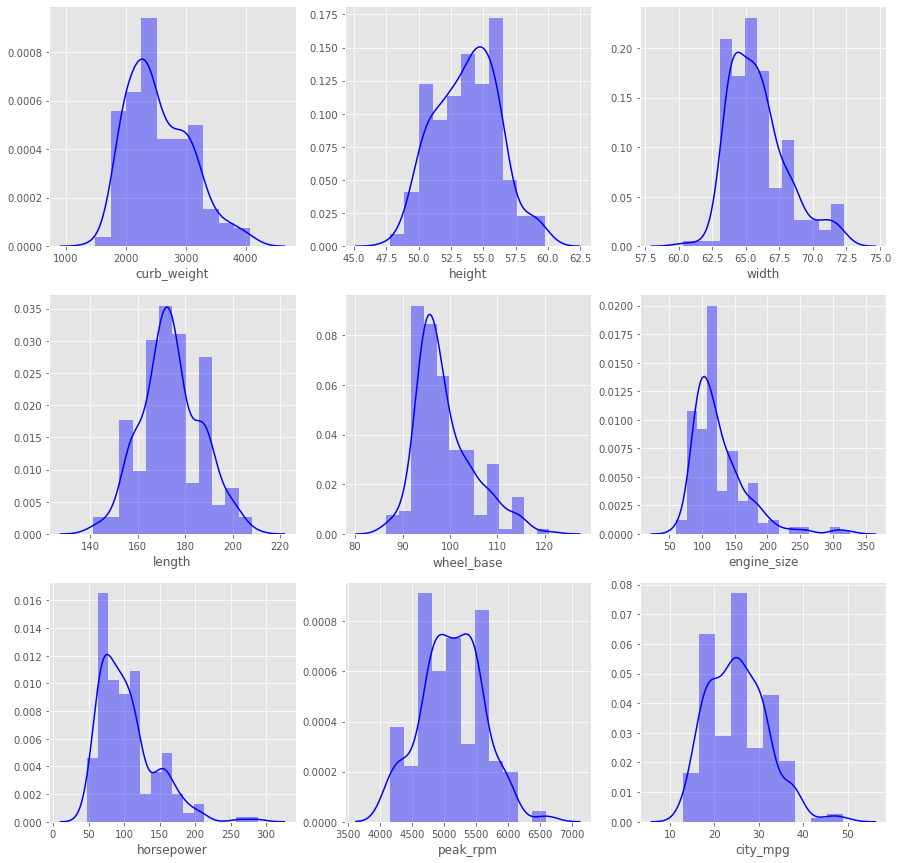

In [38]:
#Exploratory Data Analysis --- Histogram

#show the distribution of all variables by using "for loop" 
i=0
numerical_columns = df2.columns
for col in numerical_columns:
    i+=1
    plt.subplot(3,3,i)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (15,15)
    sns.distplot(df2[col], color = 'blue')

According to the histograms, length and peak-rpm show nearly normal distribution. 

The height is the left-skewed histogram, in which the mean is smaller than the median. 

Last but not least, width, wheel-base, city-mpg,curb-weight, engine-size, and horsepower is the right-skewed histogram, which the mean is bigger than the median. 

To choose the variables which may contribute to the prediction model, the correlation of the explanatory variables and the response variable will be shown in further study. 

### (c) Boxplot

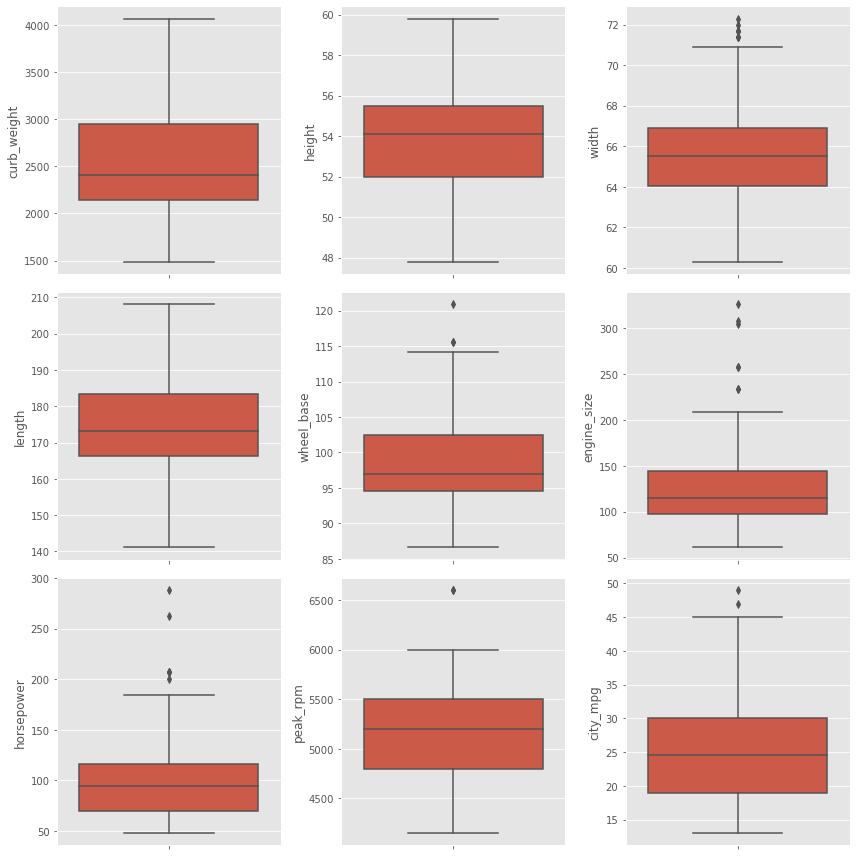

In [10]:
# Boxplot

#use subplots to show the boxplots for all numerical variables
fig, axes = plt.subplots(3, 3,figsize=(12,12))
sns.boxplot(ax=axes[0,0], x = 'curb_weight', data = df2,orient='v')
sns.boxplot(ax=axes[0,1], x = 'height', data = df2,orient='v')
sns.boxplot(ax=axes[0,2], x = 'width', data = df2,orient='v')
sns.boxplot(ax=axes[1,0], x = 'length', data = df2,orient='v')
sns.boxplot(ax=axes[1,1], x = 'wheel_base', data = df2,orient='v')
sns.boxplot(ax=axes[1,2], x = 'engine_size', data = df2,orient='v')
sns.boxplot(ax=axes[2,0], x = 'horsepower', data = df2,orient='v')
sns.boxplot(ax=axes[2,1], x = 'peak_rpm', data = df2,orient='v')
sns.boxplot(ax=axes[2,2], x = 'city_mpg', data = df2,orient='v')

# make the plots look nicer 
plt.tight_layout()

According to the boxplot, length and peak-rpm show nearly normal distribution. The height is the left-skewed, in which the mean is smaller than the median. Last but not least, width, wheel-base, city-mpg,curb-weight, engine-size, and horsepower are the right-skewed, which the mean is bigger than the median. The width, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg have some outliers, which could influence the accuracy of the models. 



### (d) Correlation Scatter Plot

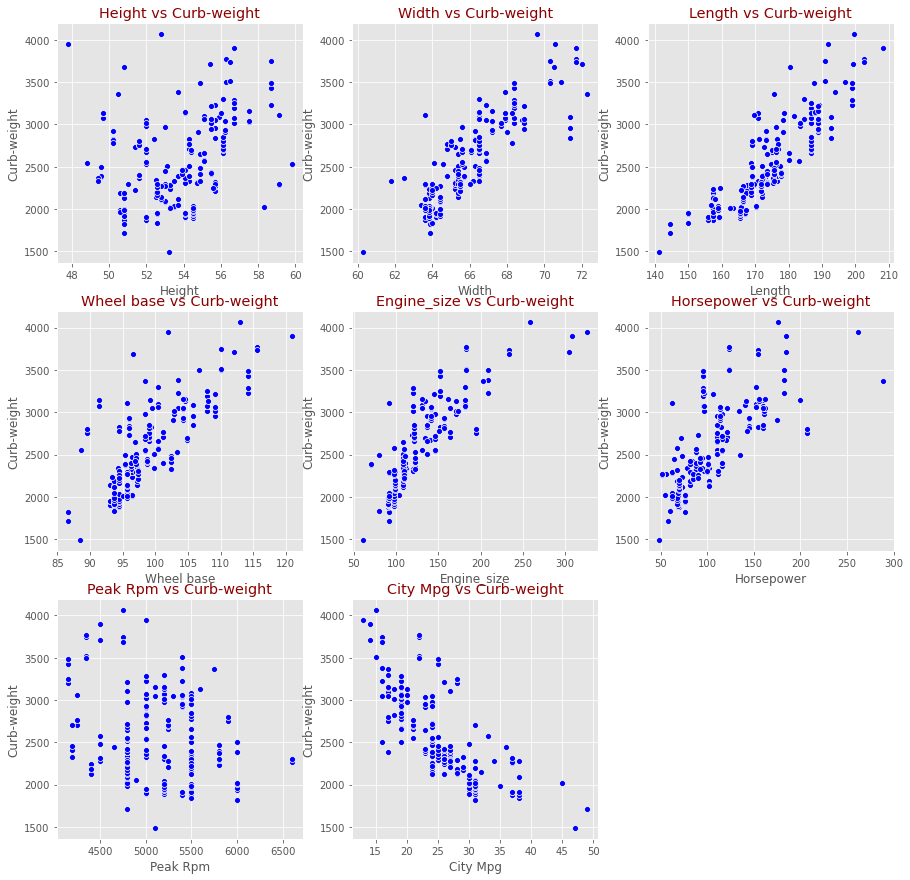

In [11]:
#Scatter plot

#Correlation between Height and Curb-weight
plt.subplot(3,3,1)
sns.scatterplot(x ='height', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Height vs Curb-weight", color="darkred")
plt.xlabel("Height") 
plt.ylabel("Curb-weight")

#Correlation between width and Curb-weight
plt.subplot(3,3,2)
sns.scatterplot(x ='width', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Width vs Curb-weight", color="darkred")
plt.xlabel("Width") 
plt.ylabel("Curb-weight")

#Correlation between length and Curb-weight
plt.subplot(3,3,3)
sns.scatterplot(x ='length', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Length vs Curb-weight", color="darkred")
plt.xlabel("Length") 
plt.ylabel("Curb-weight")

#Correlation between wheel-base and Curb-weight
plt.subplot(3,3,4)
sns.scatterplot(x ='wheel_base', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Wheel base vs Curb-weight", color="darkred")
plt.xlabel("Wheel base") 
plt.ylabel("Curb-weight")

#Correlation between engine-size and Curb-weight
plt.subplot(3,3,5)
sns.scatterplot(x ='engine_size', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Engine_size vs Curb-weight", color="darkred")
plt.xlabel("Engine_size") 
plt.ylabel("Curb-weight")

#Correlation between horsepower  and Curb-weight
plt.subplot(3,3,6)
sns.scatterplot(x ='horsepower', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Horsepower vs Curb-weight", color="darkred")
plt.xlabel("Horsepower") 
plt.ylabel("Curb-weight")

#Correlation between Peak-rpm and Curb-weight
plt.subplot(3,3,7)
sns.scatterplot(x ='peak_rpm', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Peak Rpm vs Curb-weight", color="darkred")
plt.xlabel("Peak Rpm") 
plt.ylabel("Curb-weight")

#Correlation between city-mpg and Curb-weight
plt.subplot(3,3,8)
sns.scatterplot(x ='city_mpg', y = 'curb_weight', data=df2, color ="b")
plt.rcParams['figure.figsize'] = (15,10)
plt.title("City Mpg vs Curb-weight", color="darkred")
plt.xlabel("City Mpg") 
plt.ylabel("Curb-weight")

plt.show()

According to the Scatter Plots width, length, wheel-base, engine-size, horsepower, and city-mpg have strong correlations with curb-weight; height and peak-rpm do not appear a strong correlation. And peak-rpm and city-mpg have a negative correlation with curb-weight, other variables have a positive correlation with curb-weight. In a further study, we will check the correlation coefficient to be more accurate. 

### (e) Heatmap (Correlation)

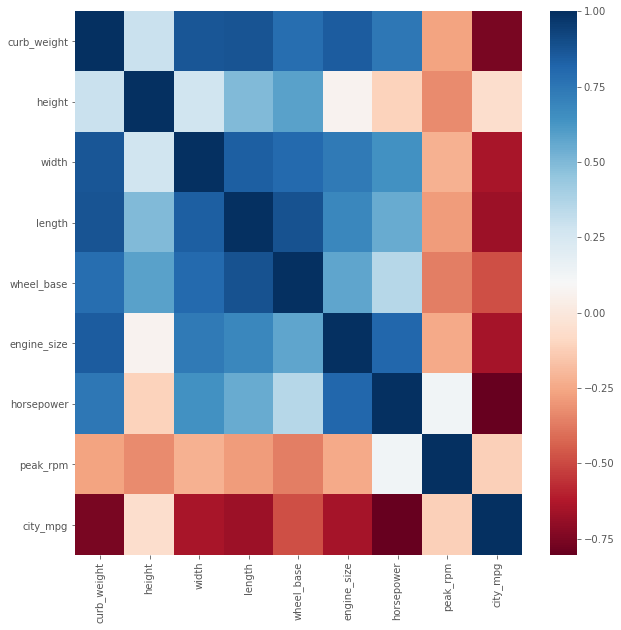

In [40]:
# Heatmap

#Correlation between each variable in df2
corr = df2.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="RdBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# show the heatmap
plt.show()

In [13]:
# check the correlation 
df2.corr()

,curb_weight,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
curb_weight,1.000000,0.298701,0.869177,0.879130,0.782315,0.850834,0.751101,-0.266372,-0.758981
height,0.298701,1.000000,0.276980,0.494804,0.584641,0.069403,-0.110136,-0.328303,-0.057259
width,0.869177,0.276980,1.000000,0.841259,0.797597,0.737059,0.644356,-0.221468,-0.646831
length,0.879130,0.494804,0.841259,1.000000,0.881246,0.684077,0.555641,-0.288046,-0.672929
wheel_base,0.782315,0.584641,0.797597,0.881246,1.000000,0.575165,0.356268,-0.365896,-0.481938
engine_size,0.850834,0.069403,0.737059,0.684077,0.575165,1.000000,0.810779,-0.244565,-0.654114
horsepower,0.751101,-0.110136,0.644356,0.555641,0.356268,0.810779,1.000000,0.131224,-0.803966
peak_rpm,-0.266372,-0.328303,-0.221468,-0.288046,-0.365896,-0.244565,0.131224,1.000000,-0.114766
city_mpg,-0.758981,-0.057259,-0.646831,-0.672929,-0.481938,-0.654114,-0.803966,-0.114766,1.000000


According to the heatmap and the correlation analysis, width, length, wheel-base, engine-size, horsepower, and city-mpg have pretty strong correlations with curb-weight; height and peak-rpm do not appear a strong correlation. And peak-rpm and city-mpg have a negative correlation with curb-weight, the other variables have a positive correlation with curb-weight. The stronger the correlation is, usually the more accurate model will have. Therefore, height and peak-rpm might not be used in the build model in further study. 

## 3. Data Splitting



Split the dataset into explanatory variables group X and response variable y(curb-weight), and using the train_test_split() function to split X and y into training and testing sets (30% of the whole dataset).

In [14]:
# move the response variable (curb_weight) to a separate variable
y = df2.curb_weight

In [15]:
# check results
y.head()

0    2548
1    2823
2    2337
3    2824
4    2507
Name: curb_weight, dtype: int64

In [16]:
#preserve the original dataframe
X = df2.copy()

In [17]:
# now drop the curb_weight column from 'X' so that the response variable is removed from the explanatory variables
X.drop('curb_weight', axis=1, inplace=True)

In [18]:

# The curb_weight column has been removed from the dataset
X.head()

,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
0,48.8,64.1,168.8,88.6,130,111,5000,21
1,52.4,65.5,171.2,94.5,152,154,5000,19
2,54.3,66.2,176.6,99.8,109,102,5500,24
3,54.3,66.4,176.6,99.4,136,115,5500,18
4,53.1,66.3,177.3,99.8,136,110,5500,19


In [19]:
# Now split the data into training and testing subsets. 
# set aside 30% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [20]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

170    2714
186    2319
187    2300
137    2050
11     2710
Name: curb_weight, dtype: int64

In [21]:
#check the results
X_test.head()

,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
170,52.0,65.6,176.2,98.4,146,116,4800,24
186,55.7,65.5,171.7,97.3,97,68,4500,37
187,55.7,65.5,171.7,97.3,109,100,5500,26
137,53.7,63.4,156.9,93.7,97,69,4900,31
11,54.3,64.8,176.8,101.2,164,121,4250,21


In [22]:
#check the results
y_train.head()

45     2734
153    2290
33     1956
133    2707
15     3380
Name: curb_weight, dtype: int64

In [23]:
#check the results
X_train.head()

,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg
45,51.4,65.2,172.6,96.0,119,90,5000,24
153,59.1,63.6,169.7,95.7,92,62,4800,27
33,52.6,64.0,150.0,93.7,92,76,6000,30
133,56.1,66.5,186.6,99.1,121,110,5250,21
15,53.7,67.9,193.8,103.5,209,182,5400,16


## 4. Regression Model Construction & Evaluation¶

Based on the previous data preparation and Exploratory Data Analysis, the final six explanatory variables candidates are width, length, wheel-base, engine-size, horsepower, and city-mpg because these variables have a stronger relationship with curb-weight.

Three different linear regression models will be created in further study.

#### Model 1

The first model will include three explanatory variables, which are width, length, and engine-size because these three variables have the strongest correlation with curb_weight. 





In [24]:
# create a new dataframe containing three mainly variables for the linear regression model
newX_train = X_train[['width','length','engine_size']].copy()

# sanity check
newX_train.head()

,width,length,engine_size
45,65.2,172.6,119
153,63.6,169.7,92
33,64.0,150.0,92
133,66.5,186.6,121
15,67.9,193.8,209


In [25]:
# creating the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores1 = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores1)

[0.93006663 0.92213854 0.82630672 0.85753151 0.93755324]


In [26]:
# calculate the average accuracy across all 5 folds
np.mean(scores1)

0.8947193289603398

The 5-fold cross-validation shows that the first model has a R^2 of 89.47%, which is not high enough. So, let's build more models to make a more accurate prediction. 

#### Model 2

The second model will include five explanatory variables, which are width, length,  wheel-base, horsepower, and engine-size because these five variables have a pretty strong positive correlation with curb_weight.

In [27]:
# create a new dataframe containing three mainly variables for the linear regression model
newX_train2 = X_train[['width','length','wheel_base','horsepower','engine_size']].copy()

# sanity check
newX_train2.head()

,width,length,wheel_base,horsepower,engine_size
45,65.2,172.6,96.0,90,119
153,63.6,169.7,95.7,62,92
33,64.0,150.0,93.7,76,92
133,66.5,186.6,99.1,110,121
15,67.9,193.8,103.5,182,209


In [28]:
# creating the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores2 = cross_val_score(model, newX_train2, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores2)

[0.93255138 0.92299176 0.82828629 0.87590308 0.94311421]


In [29]:
# calculate the average accuracy across all 5 folds
np.mean(scores2)

0.9005693434813475

The 5-fold cross-validation shows that the second model has a R^2 of 90.06%, which is above 90%, which means this model can be used to make a prediction. 

#### Model 3

The third model will include six explanatory variables, which are width, length, and wheel-base,engine-size, and city-mpg because all these six explanatory variables have a pretty strong correlation with curb-weight, and include positive and negative correlation.

In [30]:
# create a new dataframe containing three mainly variables for the linear regression model
newX_train3 = X_train[['width','length','wheel_base','engine_size','horsepower','city_mpg']].copy()

# sanity check
newX_train3.head()

,width,length,wheel_base,engine_size,horsepower,city_mpg
45,65.2,172.6,96.0,119,90,24
153,63.6,169.7,95.7,92,62,27
33,64.0,150.0,93.7,92,76,30
133,66.5,186.6,99.1,121,110,21
15,67.9,193.8,103.5,209,182,16


In [31]:

# creating the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores3 = cross_val_score(model, newX_train3, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores3)

[0.93234191 0.92848914 0.83464305 0.86632149 0.95961745]


In [32]:
# calculate the average accuracy across all 5 folds
np.mean(scores3)

0.9042826074401248

The 5-fold cross-validation shows that the third model has a R^2 of 90.43%, which is above 90%.  So using these six variables (width, length, wheel-base,engine-size, horsepower, and city-mpg) could make an accurate prediction model. 

## 5. Conclusion 

From previous analysis and applying cross-validation, the best linear regression model to predict curb-weight is built by using width, length, and wheel-base,engine-size, and city-mpg as explanatory variables. The model has a cross-validated accuracy of 90.43%. However, the first model and second model also can predict in some scenarios; for example, if the data is limited on the variables the first model and second model might work fine because of their cross-validated accuracy of 89.47% and 90.06% which is around 90%.

For future study, because we only consider height, width, length, wheel-base, engine-size horsepower, peak-rpm, and city-mpg as explanatory variables in this study, I would love to try other variables to build future models. There might be some other models that will make accurate predictions as well.





## Video Presentation link:¶   http://somup.com/crQ6Y7rwCs 

## Works Cited

1. https://archive.ics.uci.edu/ml/datasets/Automobile
2. DAV 6150 Module 2 Lecture Notes by Pro. Topor
3. https://datascience.stackexchange.com/questions/28158/how-to-calculate-the-fold-number-k-fold-in-cross-validation   
4. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
5. https://scikit-learn.org/stable/modules/cross_validation.html
6. https://seaborn.pydata.org/generated/seaborn.pairplot.html
7. https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation

    